In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from IPython.display import display

# Packages for custom plot styles
from matplotlib import rc
from matplotlib.gridspec import GridSpec
rc("font", family="serif", size=11)

,num,age,log(Te),log(L/Lo),Xc,Yc,Lg/L,rhoc,Tc,Radius,...,Dif,alpha,over,Rconv,Z,X,Mass,DPl1,Mover,m(he)
0,1,251.887,3.59102,2.29569,0.689,0.2843,1.0,0.000567,412017.0,30.7932,...,0.0,1.8,0.05,0.0,0.0267,0.689,2.982710e+33,1.095310e+09,1.0,0.0
1,2,478.971,3.59310,2.26856,0.689,0.2843,1.0,0.000635,428097.0,29.5621,...,0.0,1.8,0.05,0.0,0.0267,0.689,2.982710e+33,1.026890e+09,1.0,0.0
2,3,730.051,3.59516,2.24145,0.689,0.2843,1.0,0.000712,444778.0,28.3834,...,0.0,1.8,0.05,0.0,0.0267,0.689,2.982710e+33,9.626770e+08,1.0,0.0
3,4,1007.850,3.59719,2.21431,0.689,0.2843,1.0,0.000798,462097.0,27.2540,...,0.0,1.8,0.05,0.0,0.0267,0.689,2.982710e+33,8.961590e+08,1.0,0.0
4,5,1314.930,3.59921,2.18721,0.689,0.2843,1.0,0.000894,480068.0,26.1723,...,0.0,1.8,0.05,0.0,0.0267,0.689,2.982710e+33,8.342960e+08,1.0,0.0


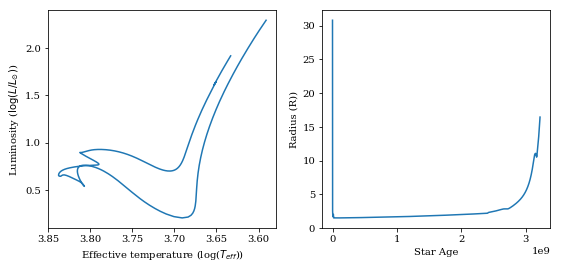

In [2]:
folder = "../../../../../Volumes/My Passport/NGC6819/"

file = "M1.50.X0.689.Z0.0267/M1.50.X0.689.Z0.0267-sum.txt"

df = pd.read_csv(folder+file, skiprows=3, delim_whitespace=True, 
                 names=['num', 'age', 'log(Te)', 'log(L/Lo)', 'Xc', 'Yc', 'Lg/L', 'rhoc', 'Tc', 'Radius', 'Mnc', 
                        'logg', '(Z/X)_s', 'Dif', 'alpha', 'over', 'Rconv', 'Z', 'X', 'Mass', 'DPl1', 'Mover', 'm(he)'])
display(df.head())

plt.figure(1, figsize=(9,4))
plt.subplot(121)
plt.plot(df['log(Te)'], df['log(L/Lo)'])
#plt.plot(df.loc[(df.log_R > 0.3)].log_Teff, df.loc[(df.log_R > 0.3)].log_L)
plt.gca().invert_xaxis()
plt.xlabel('Effective temperature (log($T_{eff}$))')
plt.ylabel('Luminosity ($\log(L/L_{\odot})$)')
plt.subplot(122)
plt.plot(df['age'], df['Radius'])
plt.xlabel('Star Age')
plt.ylabel('Radius (R))')
plt.show()

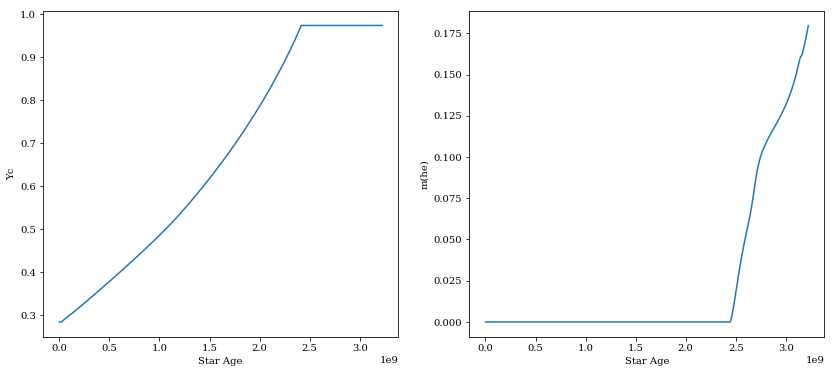

In [3]:
plt.figure(1, figsize=(14,6))
plt.subplot(121)
plt.plot(df['age'], df['Yc'])
#plt.plot(df.loc[(df.log_R > 0.3)].log_Teff, df.loc[(df.log_R > 0.3)].log_L)
plt.xlabel('Star Age')
plt.ylabel('Yc')

plt.subplot(122)
plt.plot(df['age'], df['m(he)'])
plt.xlabel('Star Age')
plt.ylabel('m(he)')
plt.show()

0.2843 0.28430000000000005


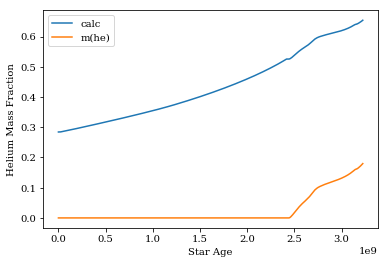

In [4]:
#Y = (df['Yc']*df['m(he)']/1.4)+(1-df['X']-df['Z'])*((1.4-df['m(he)'])/1.4)
print(min(df['Yc']), 1-min(df['X'])-min(df['Z']))
#apparently 35% of RGs mass is its core, hence next line
Y = (df['Yc']*(0.35*1.4)+(0.65*1.4*(1-min(df['X'])-min(df['Z'])))+df['m(he)'])/1.4
plt.plot(df['age'], Y, label='calc')
plt.plot(df['age'], df['m(he)'], label='m(he)')
plt.xlabel('Star Age')
plt.ylabel('Helium Mass Fraction')
#print('Initial Mass = 1.0 Msol, Initial Helium Fraction = 0.24, Metallicity = +0.00')
#print('Helium increases from ', min(df['total_mass_he4']), ' to ', max(df['total_mass_he4']))
#plt.plot(df['star_age'], df['he_core_mass'])
#print(max(df['age']))
#plt.xlim(2.2e9)
plt.legend()

(0, 17.5)

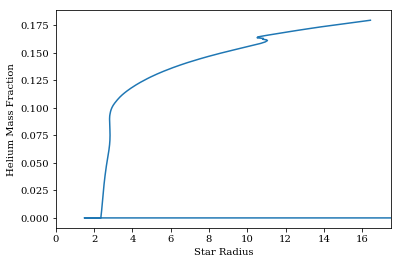

In [5]:
plt.plot(df['Radius'], df['m(he)'])
plt.xlabel('Star Radius')
plt.ylabel('Helium Mass Fraction')
#print('Initial Mass = 1.0 Msol, Initial Helium Fraction = 0.24, Metallicity = +0.00')
#print('Helium increases from ', min(df['total_mass_he4']), ' to ', max(df['total_mass_he4']))
#plt.plot(df['star_age'], df['he_core_mass'])
plt.xlim([0, 17.5])

In [6]:
#Import output data
output = pd.read_csv('../data/output_back_filesremoved.csv', usecols=[1,11,24])
#Import APOKASC data
df_met = pd.read_csv('../data/APOKASC2.txt', delim_whitespace=True, usecols=np.arange(0,31))
#Import star classifications
df_class = pd.read_csv('../data/RGclassification.txt', header=None, delim_whitespace=True, names=['KIC', 'type'])
#Import stan fitted star parameters
df_stanstars = pd.read_csv('../data/stanfits/ngc6819_tau.csv', names = ['KIC', 'dnu',
                                         'numax', 'epsilon', 'alpha', 'A', 'G', 'phi', 'tau'])
df_stanstars['KIC'] = df_stanstars['KIC'].astype(int)
df_met.head()

,KIC,2MASS,Teff,S_Teff,FeH,S_FeH,Afe,S_Afe,Nmax,S_Nmax,...,Logg(seis),S_Gran,S_Gsys,<Rho>,S_Rrhoran,S_Rhosys,LogAge,S_LogageP,S_LogageM,Av
0,1027110,2M19250937+3644599,4177.6,51.8,-0.232,0.025,0.205,0.015,6.496,0.015,...,1.692,0.007,0.007,1.082E-04,0.058,0.008,4.002,0.205,-0.189,0.269
1,1027337,2M19252021+3647118,4636,67.3,0.275,0.024,0.023,0.01,73.975,0.009,...,2.772,0.005,0.007,4.029E-03,0.026,0.007,3.798,0.099,-0.09,0.214
2,1160789,2M19233280+3652207,4729.6,72.3,-0.257,0.034,0.188,0.015,25.209,0.015,...,2.308,0.007,0.01,9.635E-04,0.069,0.008,3.889,0.133,-0.146,0.009
3,1160986,2M19234825+3649476,4339.7,61.4,0.135,0.022,0.029,0.012,...,...,...,...,...,...,...,...,...,...,...,...,No
4,1161447,2M19241746+3651460,4776.1,86.2,0.058,0.029,-0.006,0.013,37.066,0.027,...,2.478,0.012,0.01,1.340E-03,0.052,0.008,3.396,0.166,-0.145,0.4


In [7]:
#display(df_met.KIC)
#display(df_stanstars.KIC)
print(len(df_stanstars.KIC))
metap = []
masap = []
agap = []
df_dropped = df_stanstars
for i in df_stanstars.KIC:
    if i in df_met.KIC.values:
        metap.append(float(df_met.loc[df_met.KIC == i]['FeH'].values[0]))
        masap.append(float(df_met.loc[df_met.KIC == i]['M(cor)'].values[0]))
        agap.append(float(df_met.loc[df_met.KIC == i]['LogAge'].values[0]))
    else:
        
        df_dropped = df_dropped.drop(df_stanstars.loc[df_stanstars.KIC == i].index)

print(len(df_dropped))
df_dropped['met'] = metap
df_dropped['mass'] = masap
df_dropped['logage'] = agap
df_dropped = df_dropped.drop([38])
df_dropped.head(200)
print(min(df_dropped.met), max(df_dropped.met))

49
39
-0.093 0.196


In [8]:
Masses = np.arange(1.40, 1.75, 0.01)
MetHe = ['X0.674.Z0.0329', 'X0.689.Z0.0267', 'X0.701.Z0.0216', 'X0.711.Z0.0174', 
         'X0.719.Z0.0140', 'X0.725.Z0.0112', 'X0.730.Z0.0090']

Xsol = 0.7381
Zsol = 0.0134
FeH = []
Y0 = []
for i in MetHe:
    x = float(i[1:6])
    z = float(i[8:14])
    Y0.append(1-x-z)
    FeH.append(np.log10(z/x)-np.log10(Zsol/Xsol))
FeH
print(Masses)
print(Y0)
Y0.pop(len(Y0)-1)
print(Y0)

[1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75]
[0.29309999999999997, 0.28430000000000005, 0.27740000000000004, 0.27160000000000006, 0.267, 0.26380000000000003, 0.261]
[0.29309999999999997, 0.28430000000000005, 0.27740000000000004, 0.27160000000000006, 0.267, 0.26380000000000003]


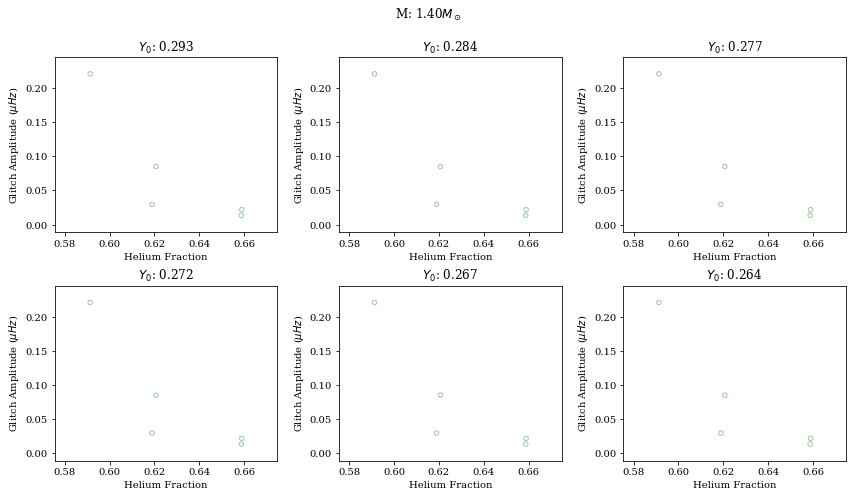

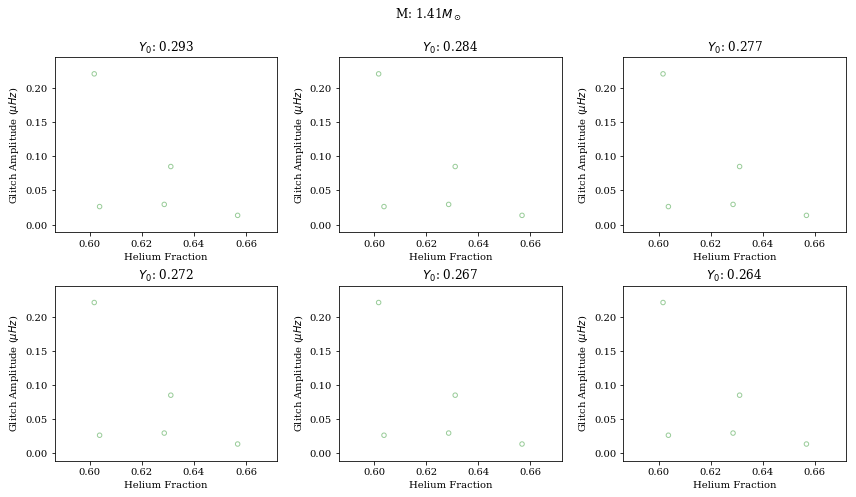

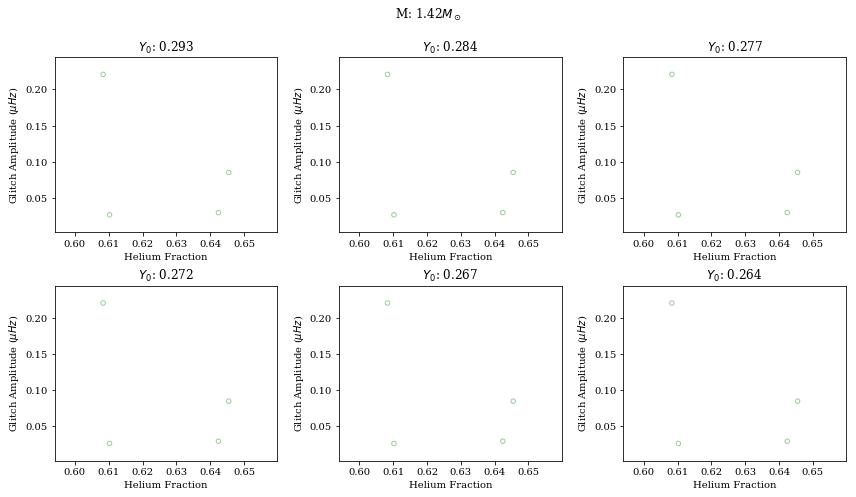

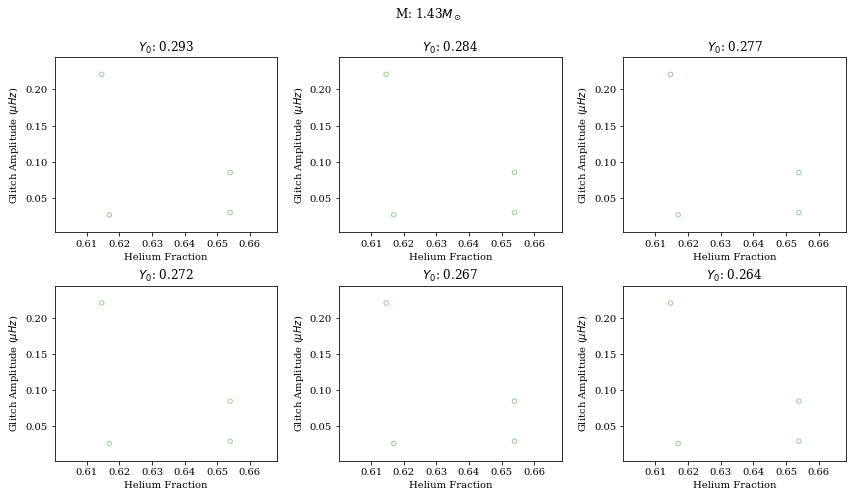

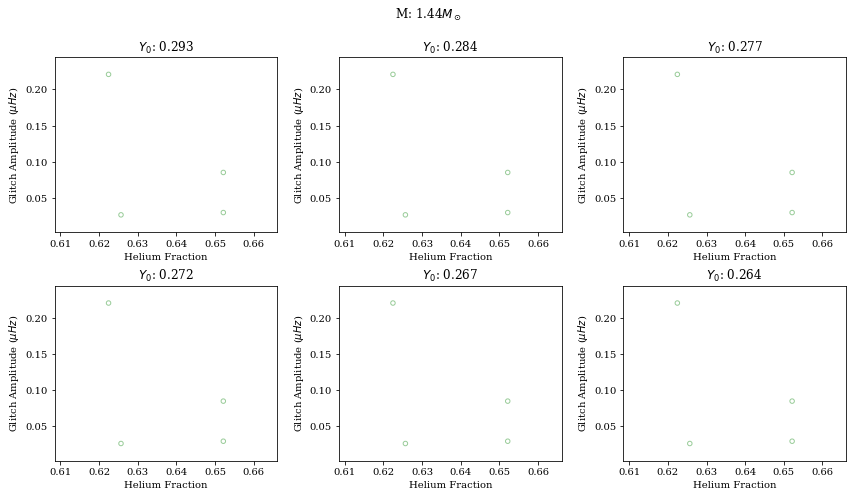

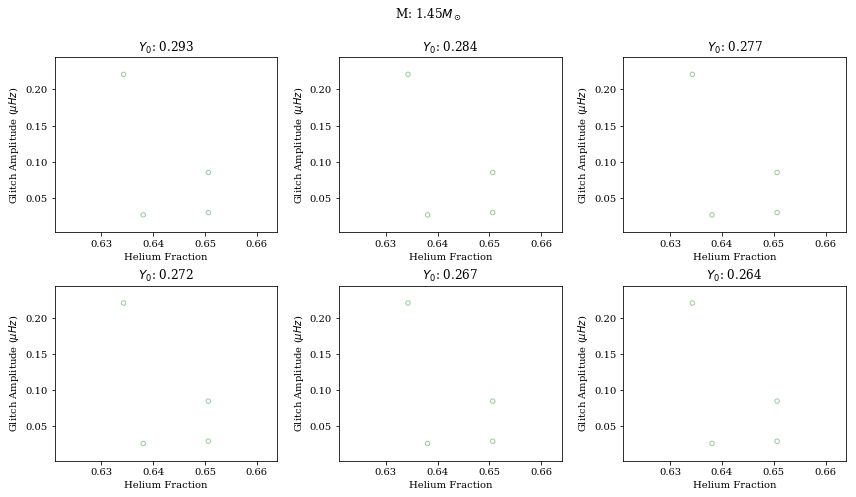

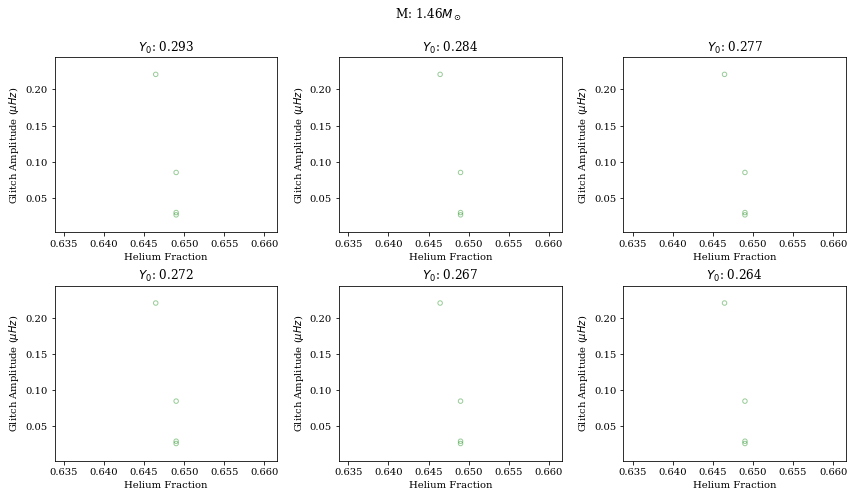

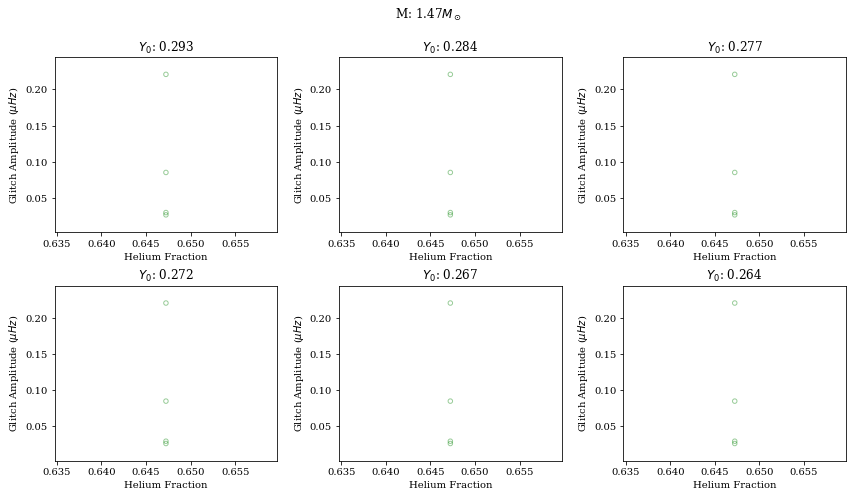

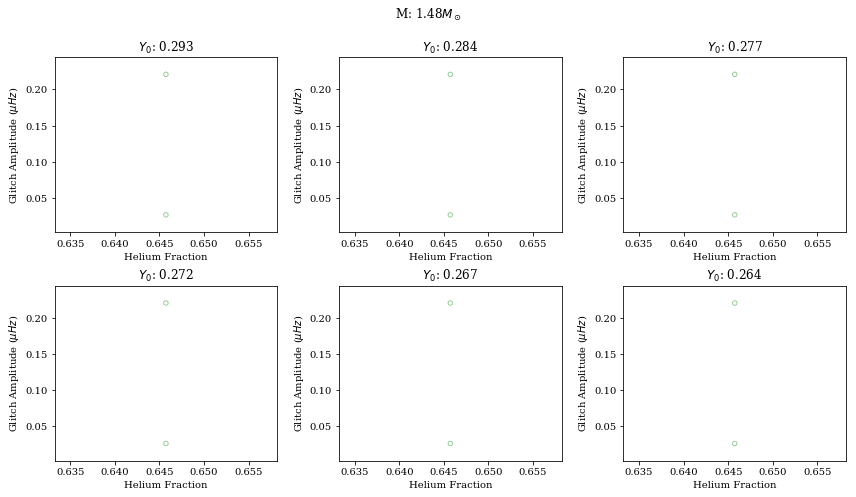

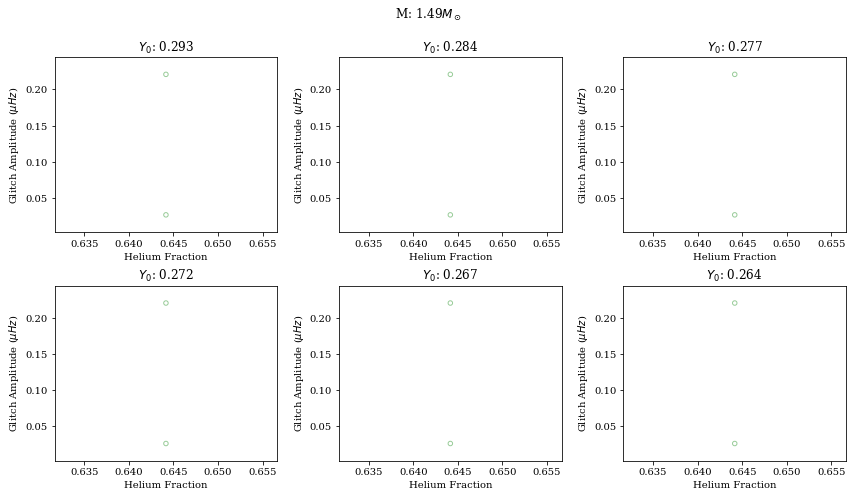

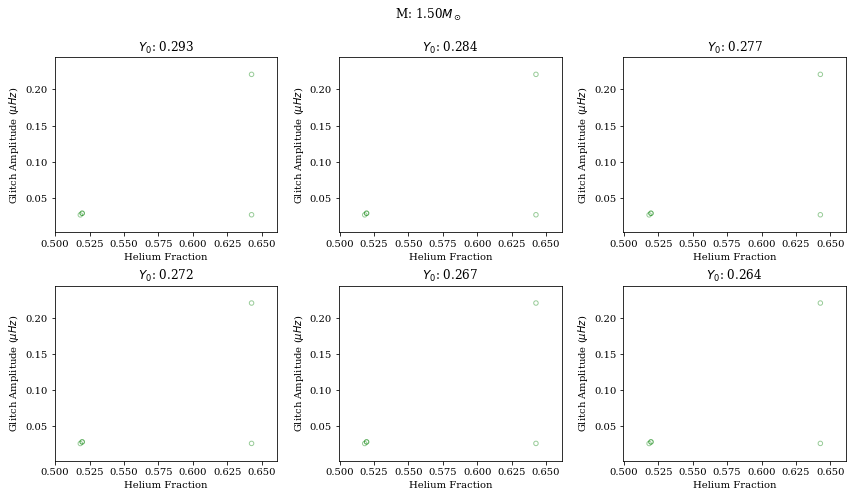

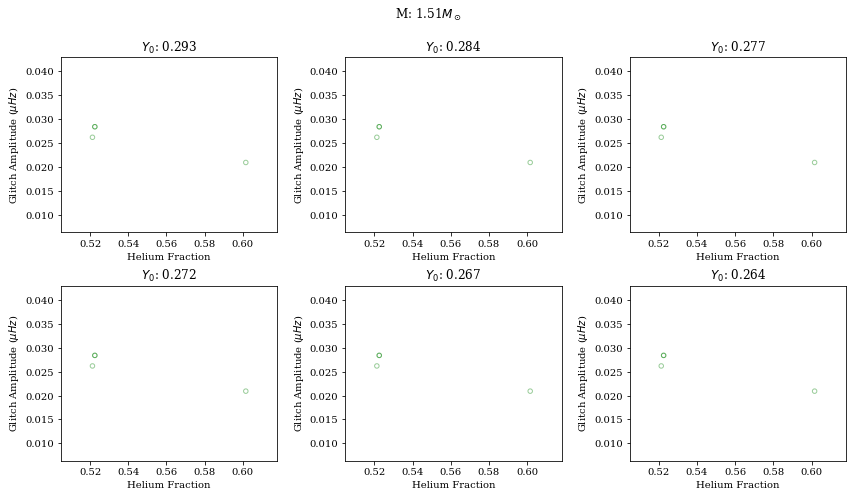

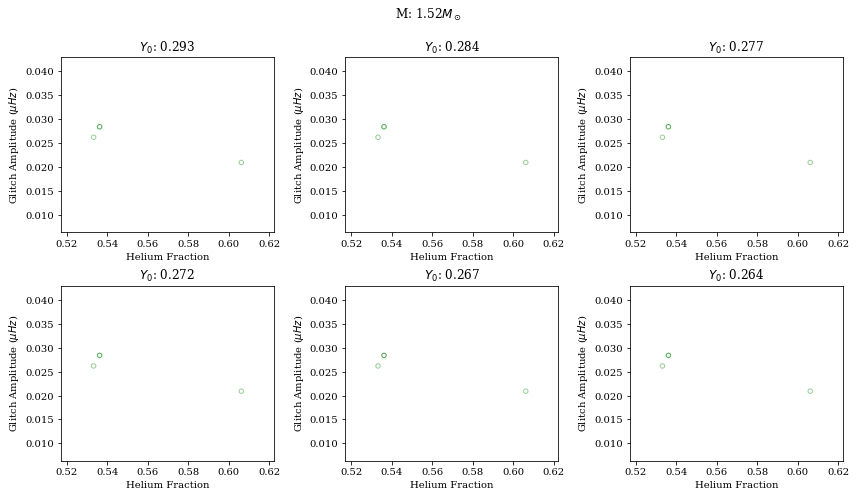

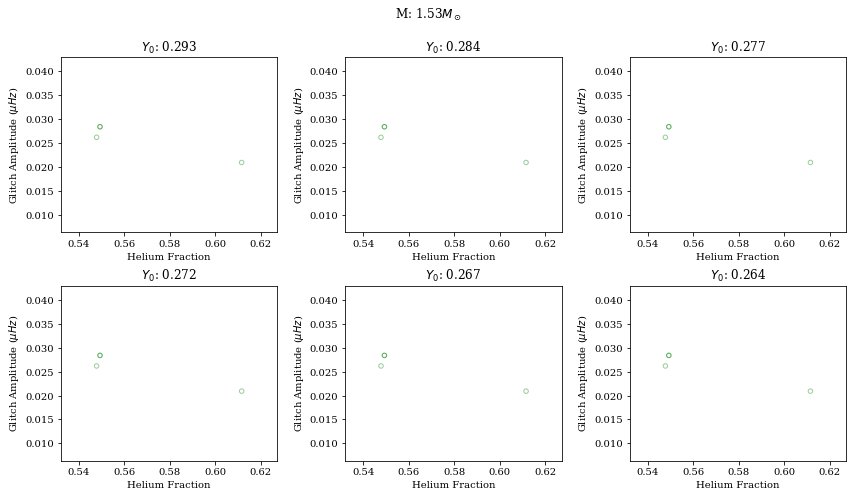

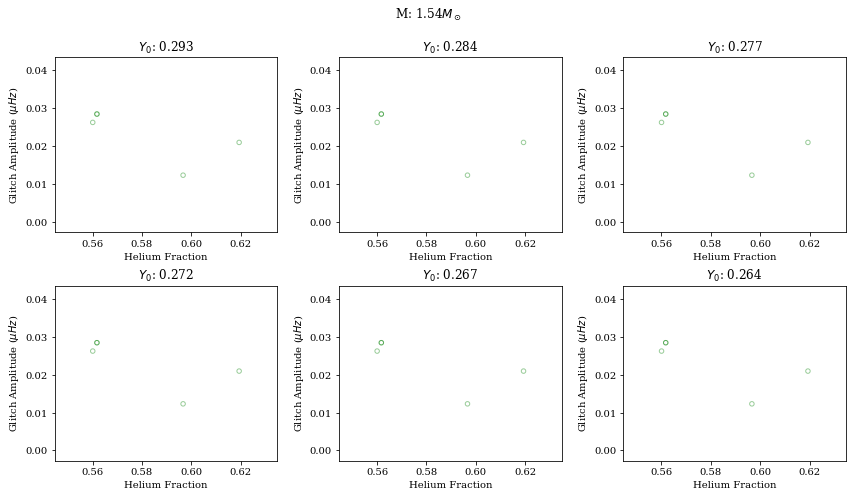

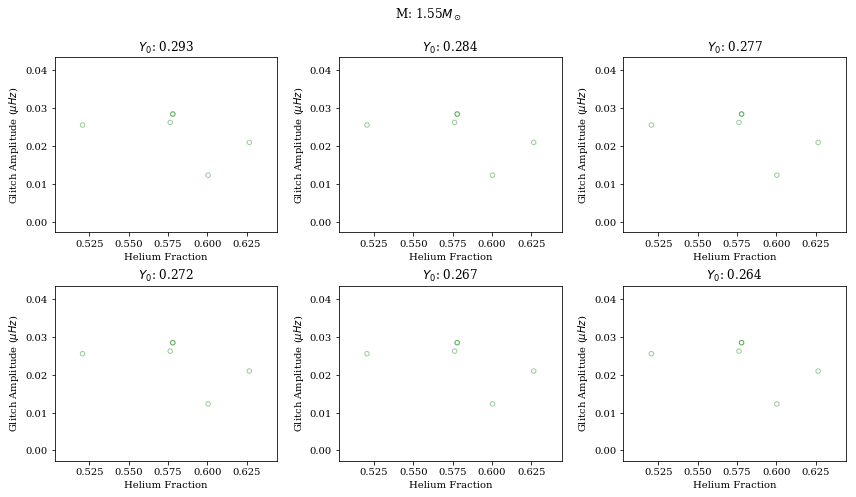

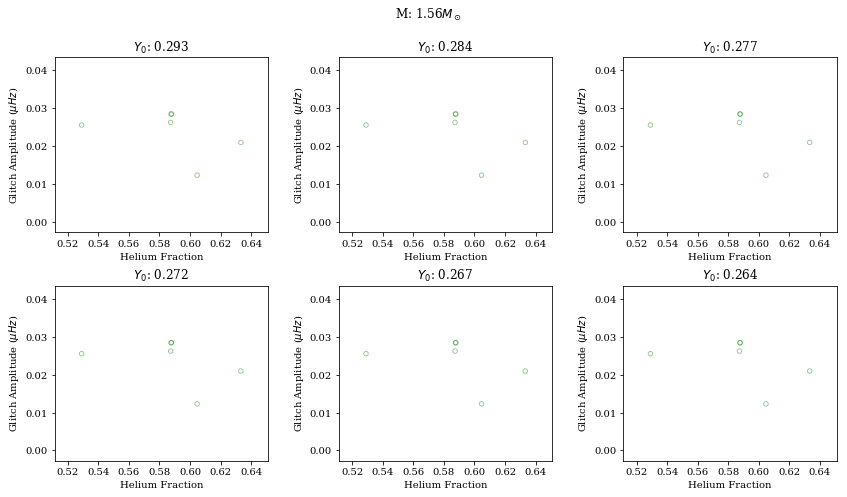

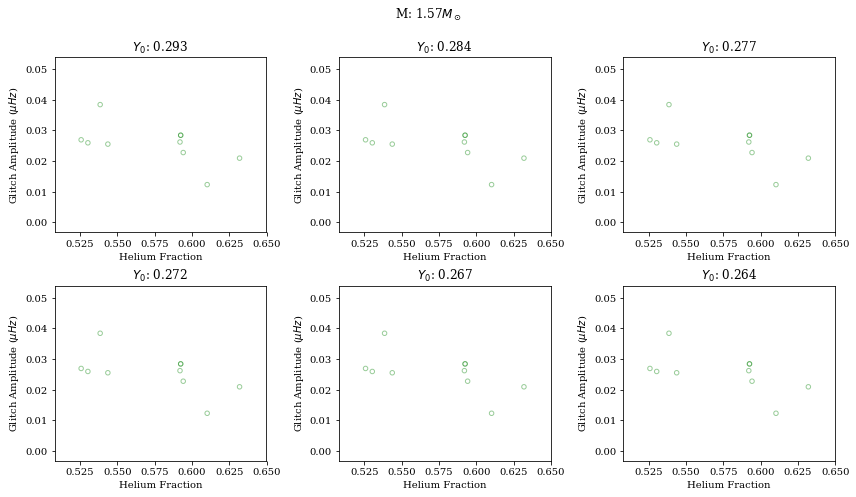

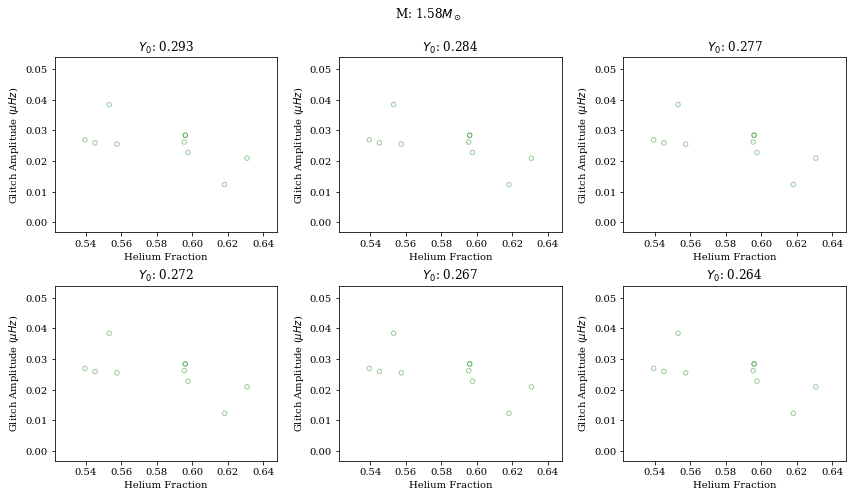

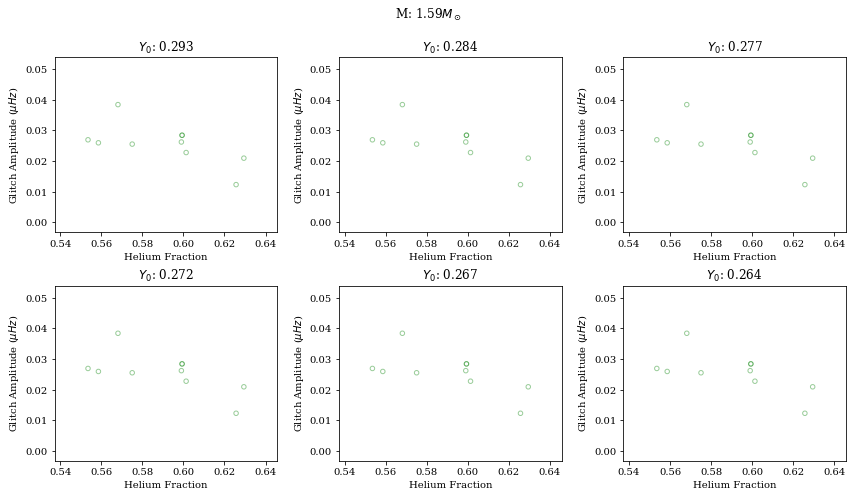

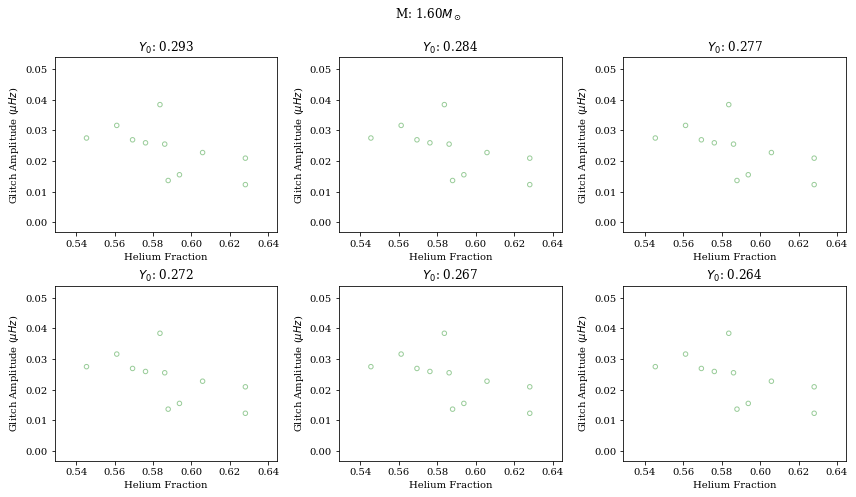

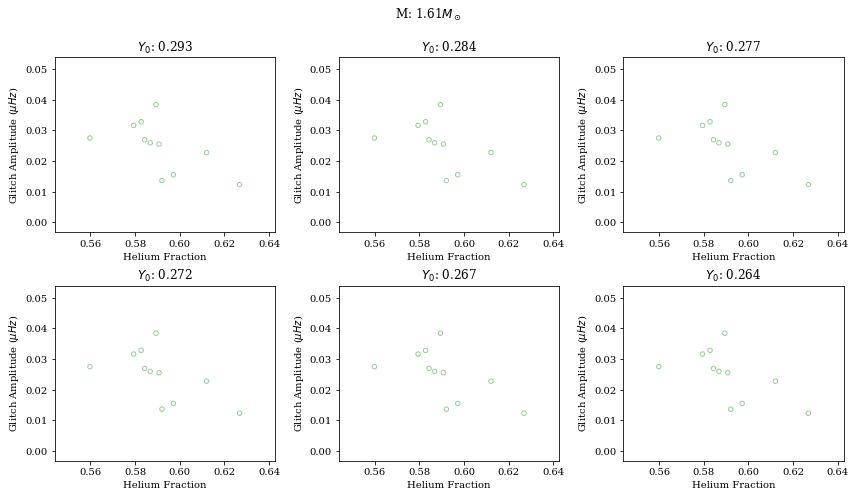

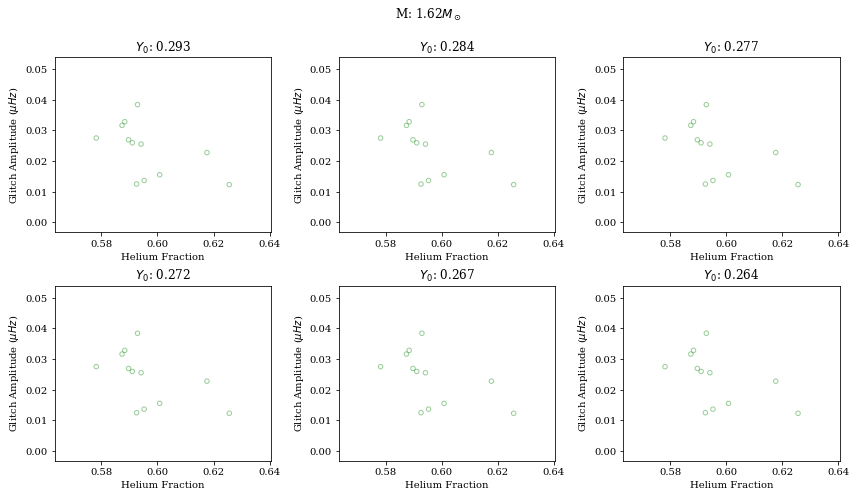

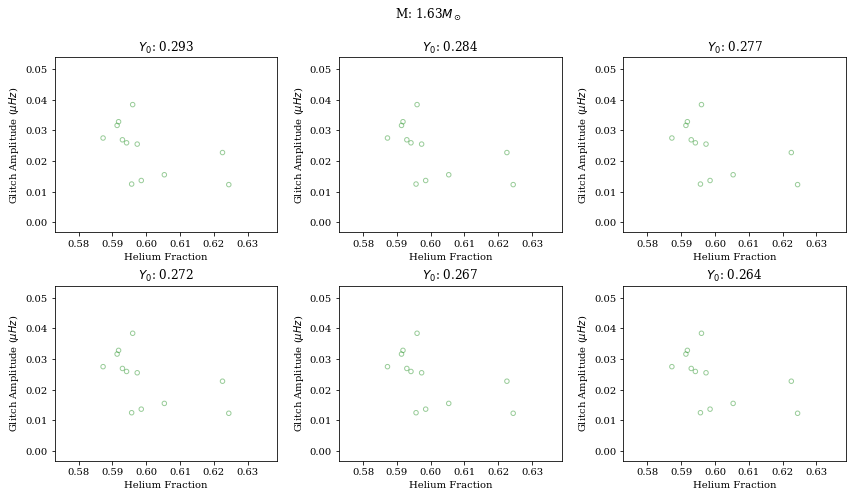

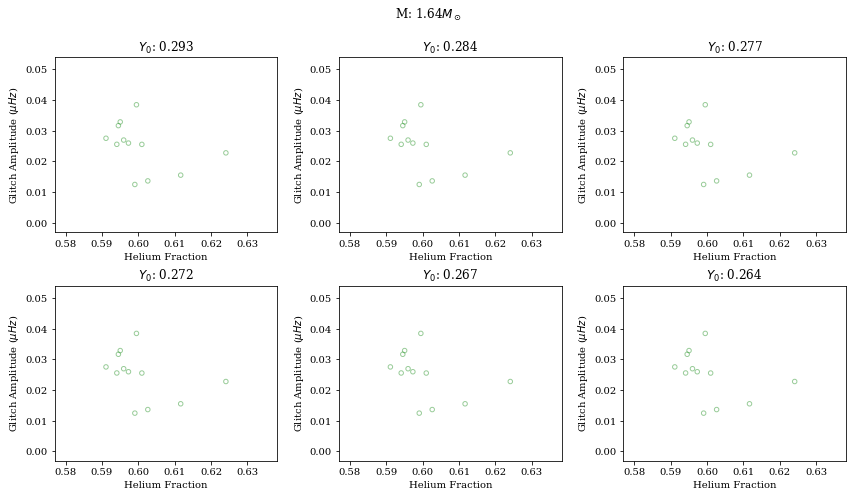

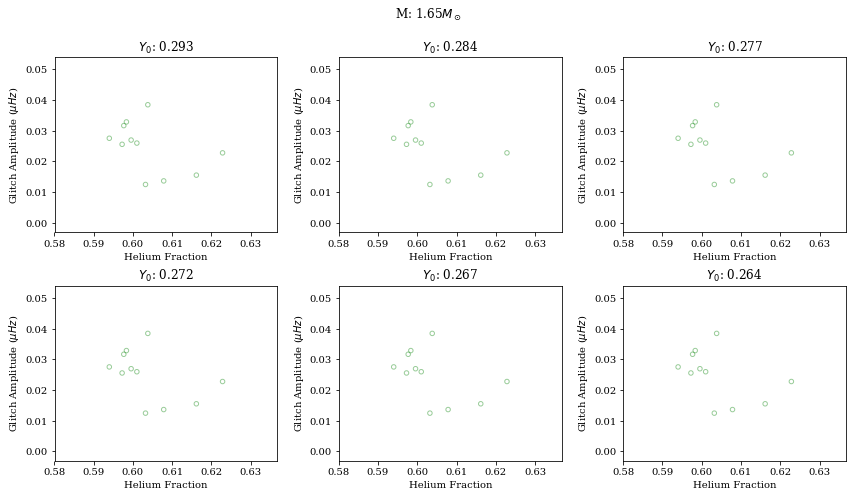

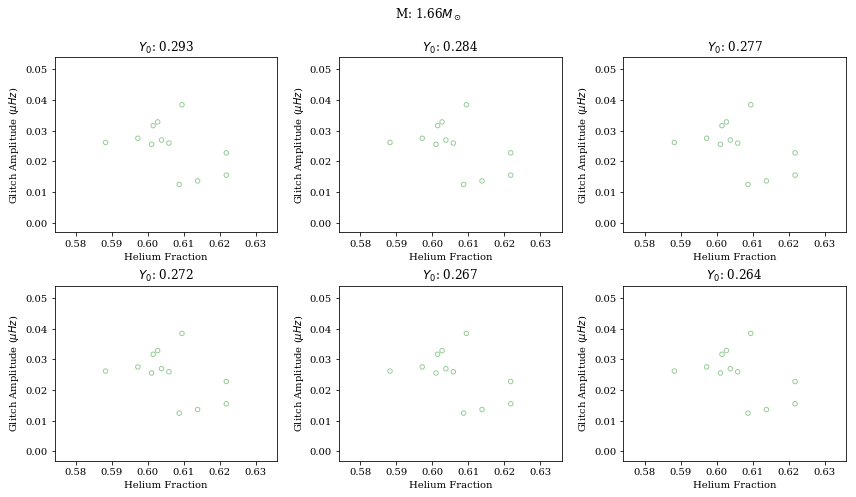

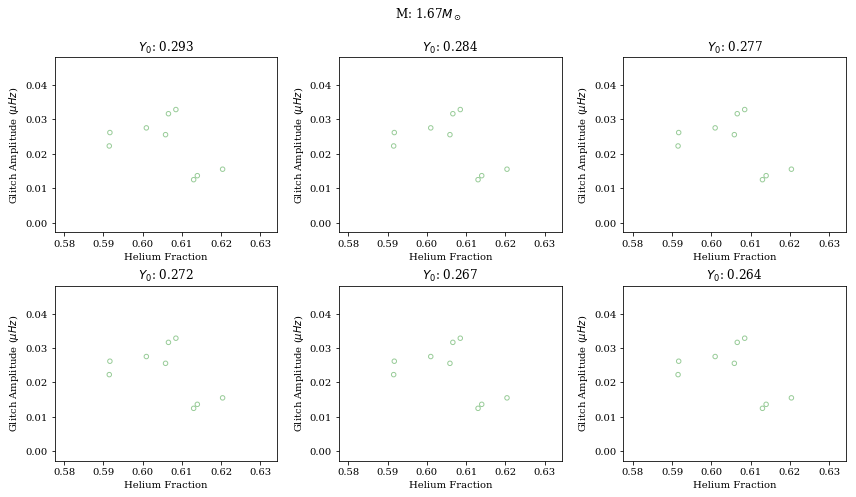

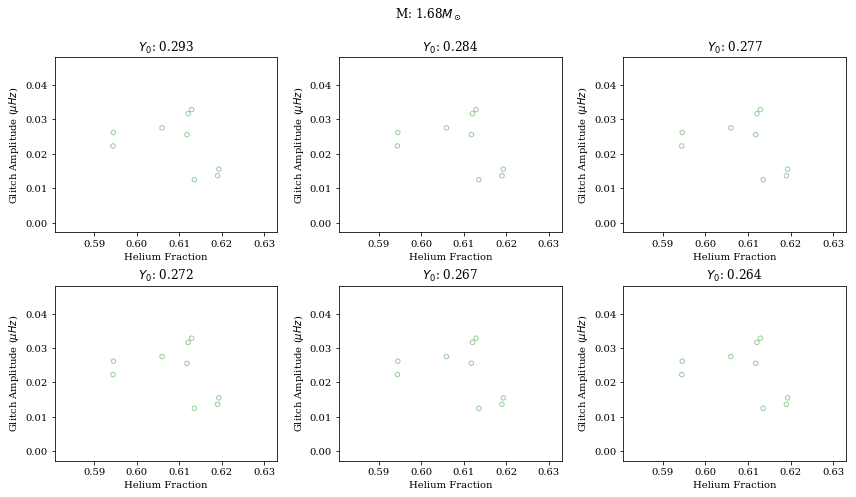

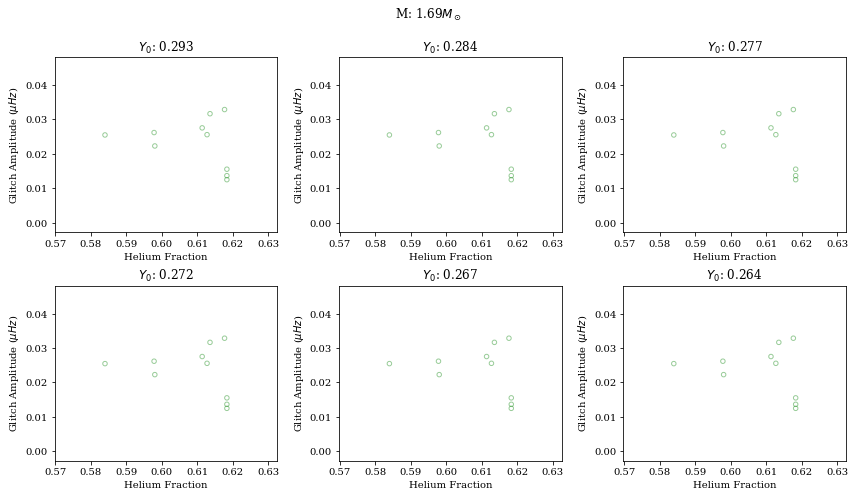

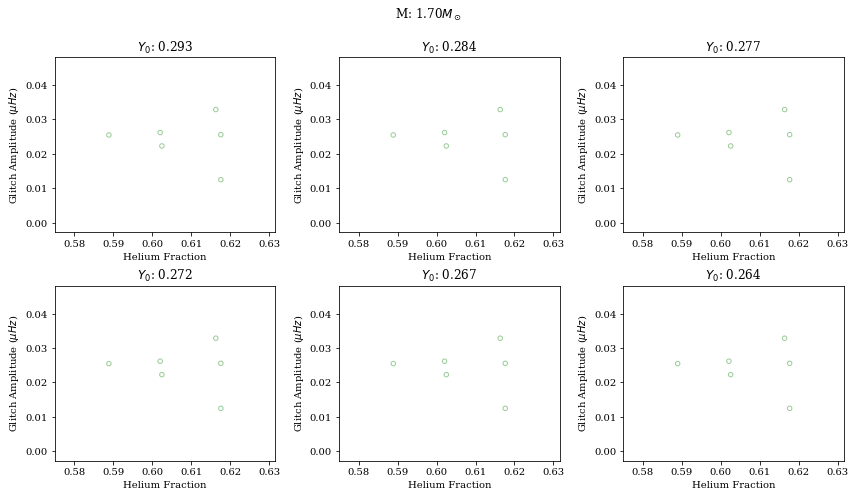

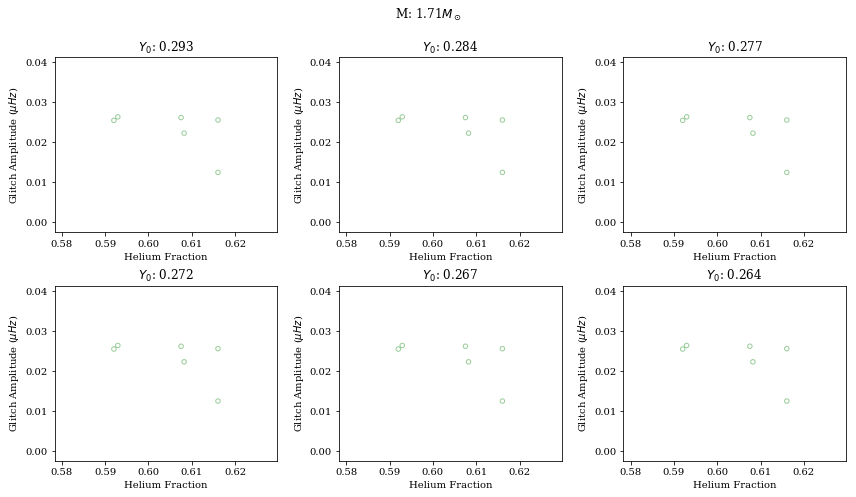

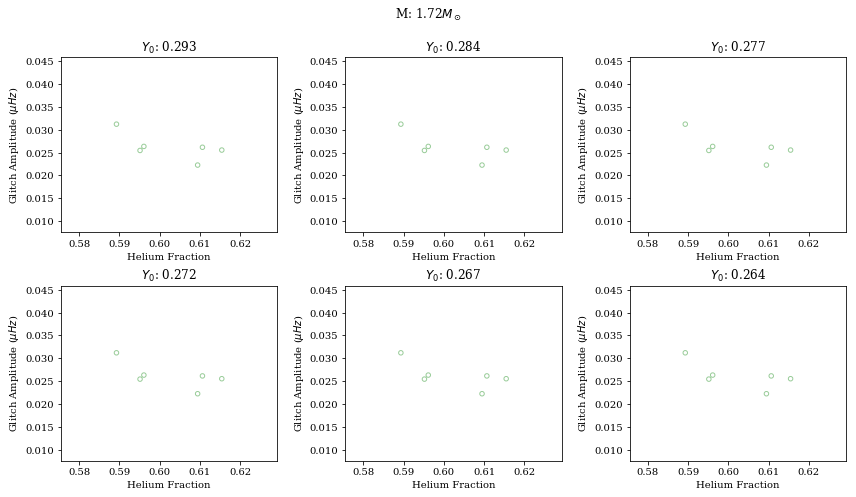

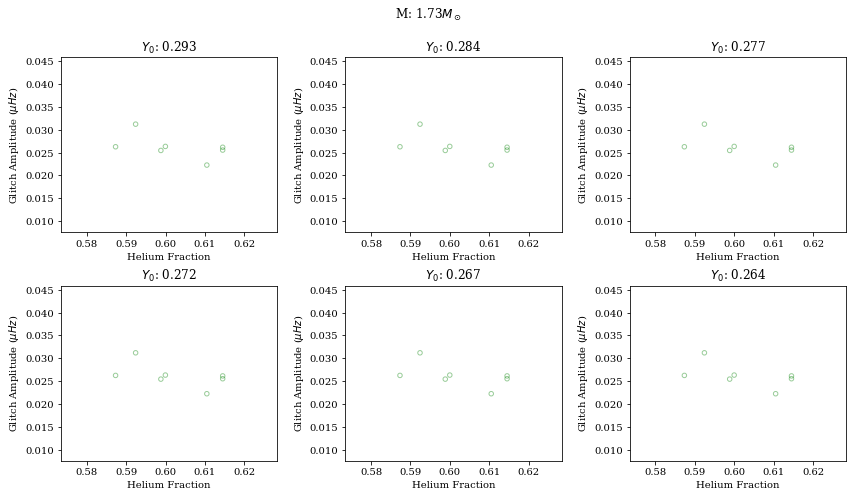

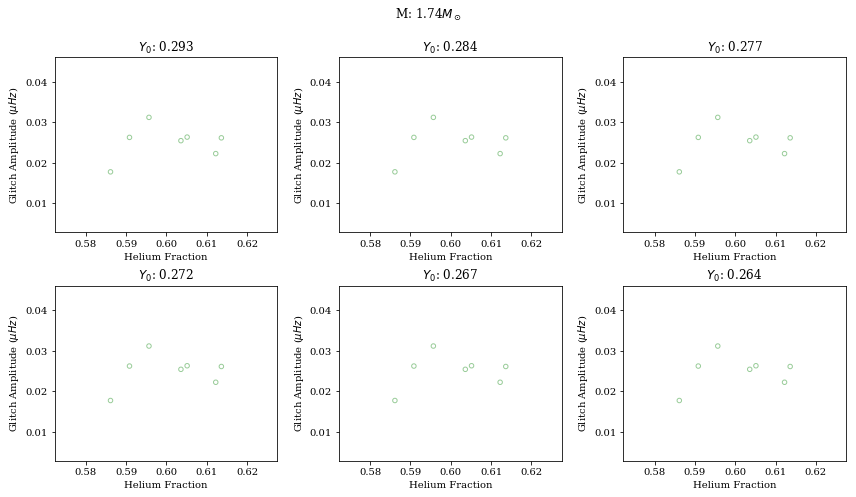

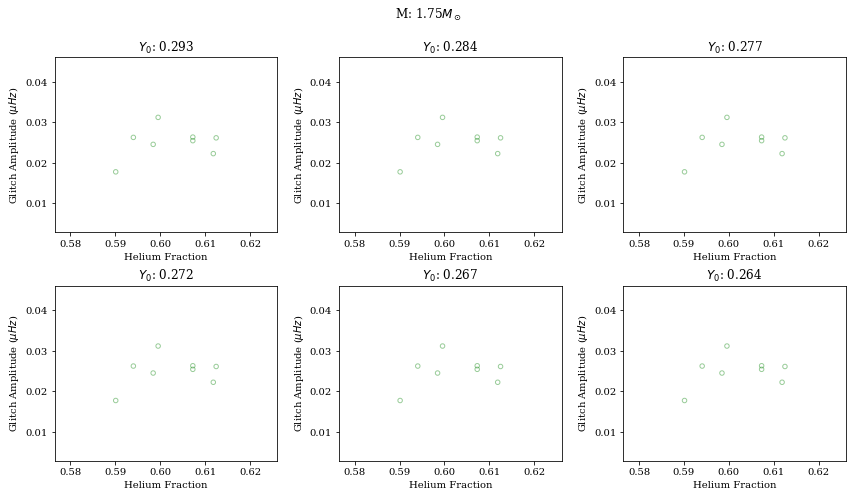

In [17]:
%matplotlib inline
kwargs = dict(s=20, facecolors='none', edgecolors='green', alpha=0.4, zorder=2)
rclkwg = dict(s=20, facecolors='none', edgecolors='red', alpha=0.4, zorder=1)
errkwg = dict(fmt="none", c='lightgrey', capsize=2, alpha=0.8, markersize=4, elinewidth=1, zorder=-1)
p = []

for M in Masses:
    HeFrac = Y0
    Mets = FeH
    masrng = 0.05
    f = plt.figure(figsize=(12,7))
    f.suptitle('M: '+str('%.2f' % M)+r'$M_\odot$')
    ax = []*6
    for HeF, pos in zip(HeFrac, range(len(HeFrac))):
        df_sta = df_dropped.loc[(df_dropped['mass'] <= M+masrng) & (df_dropped['mass'] >= M-masrng)]
        #display(df_sta)
        #HeF = 0.28
        As = []
        Ys = []
        for i, j in zip(df_sta.met, df_sta.KIC):
            met1 = min(Mets, key=lambda l:abs(l-i))
            metfind = MetHe[Mets.index(met1)]
            file = "M" + str('%.2f' % M) + "." + metfind + "/M" + str('%.2f' % M) + "." + metfind + "-sum.txt"
            df1 = pd.read_csv(folder+file, skiprows=3, delim_whitespace=True, dtype = float,
                             names=['num', 'age', 'log(Te)', 'log(L/Lo)', 'Xc', 'Yc', 'Lg/L', 'rhoc', 'Tc', 'Radius', 'Mnc', 
                                    'logg', '(Z/X)_s', 'Dif', 'alpha', 'over', 'Rconv', 'Z', 'X', 'Mass', 'DPl1', 'Mover', 'm(he)'])
            
            df_sta = df_sta.drop_duplicates(subset = 'KIC', keep='first')
            
            As.append(df_sta.loc[df_sta['KIC']==j].A.values)
            
            #print(df_sta.KIC)
            age = float(1000000*10**df_sta.loc[df_sta['KIC']==j].logage.values)
            #print(age)
            ages = df1.age.values
            age1 = min(ages, key=lambda l:abs(l-age))
            #print((df1.loc[df1['age'] == age1]['Yc'].values[0]*(0.35*M)+
                              #(0.65*M*(1-min(df1['X'])-min(df1['Z'])))+df1.loc[df1['age'] == age1]['m(he)'].values[0])/M)
            Ys.append((df1.loc[df1['age'] == age1]['Yc'].values[0]*(0.35*M)+
                              (0.65*M*(1-min(df1['X'])-min(df1['Z'])))+df1.loc[df1['age'] == age1]['m(he)'].values[0])/M)
        p.append([As, Ys])
        #print(HeF, file, Ys[0])
        #print(len(As), len(Aerr))
        #print(Aerr, As)
        ax = f.add_subplot(230+(pos+1))
        ax.scatter(Ys, As, **kwargs)
        #ax.errorbar(Ys, As, yerr=Aerr, **errkwg)
        ax.set_title(r'$Y_0$: '+ str('%.3f' % HeF))
        ax.set_xlabel('Helium Fraction')
        ax.set_ylabel('Glitch Amplitude ($\mu Hz$)')
        #ax.set_ylim([0,0.25])
        #print('po')
    f.tight_layout()
    f.subplots_adjust(top=0.88)
    f.savefig('../Graphs/MesaStan_comp/NGC6819-'+str('%.2f' % M)+'.pdf')


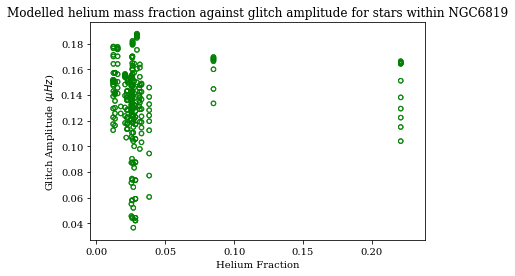

In [10]:
for i in p:
    plt.scatter(i[0], i[1], **kwargs)
#ax.errorbar(Ys, As, yerr=Aerr, **errkwg)
plt.title(r'Modelled helium mass fraction against glitch amplitude for stars within NGC6819')
plt.xlabel('Helium Fraction')
plt.ylabel('Glitch Amplitude ($\mu Hz$)')
#ax.set_ylim([0,0.25])

plt.savefig('../Graphs/MesaStan_comp/NGC6819-all.pdf')

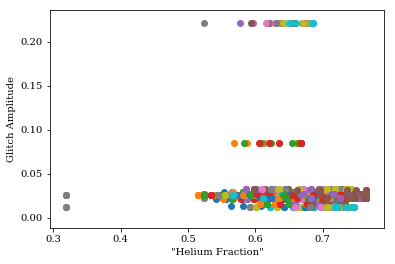

In [11]:
for i in Masses:
    Ys = []
    As = []
    for j in MetHe: 
        for k in FeH:
            file = "M" + str('%.2f' % i) + "." + j + "/M" + str('%.2f' % i) + "." + j + "-sum.txt"
            #print(file)
            df1 = pd.read_csv(folder+file, skiprows=3, delim_whitespace=True, dtype = float,
                         names=['num', 'age', 'log(Te)', 'log(L/Lo)', 'Xc', 'Yc', 'Lg/L', 'rhoc', 'Tc', 'Radius', 'Mnc', 
                                'logg', '(Z/X)_s', 'Dif', 'alpha', 'over', 'Rconv', 'Z', 'X', 'Mass', 'DPl1', 'Mover', 'm(he)'])

            masses = df_dropped.mass.values
            metses = df_dropped.met.values
            diffs = []
            for b, c in zip(masses, metses):
                    diffs.append(abs(i-b) + abs(k-c))
            w = diffs.index(min(diffs))
            df_sta = df_dropped.iloc[w,:]
            #print(df_sta.A)
            
            As.append(df_sta.A)
            
            age = float(1000000*10**df_sta.logage)
            ages = df1.age.values
            age1 = min(ages, key=lambda l:abs(l-age))
            
            Ys.append((df1.loc[df1['age'] == age1]['Yc'].values[0]*(0.35*i)+
                          (0.65*i*(1-min(df1['X'])-min(df1['Z'])))+df1.loc[df1['age'] == age1]['m(he)'].values[0])/1.4)

            
            
            '''mass1 = min(masses, key=lambda l:abs(l-i))
            A_mas.append(df_dropped.loc[df_dropped.mass == mass1].A.values[0])

            age_mas = float(1000000*10**df_dropped.loc[df_dropped.mass == mass1].logage.values[0])
            ages_mas = df1.age.values
            age1 = min(ages_mas, key=lambda l:abs(l-age_mas))

            Y_mas.append((df1.loc[df1['age'] == age1]['Yc'].values[0]*(0.35*i)+
                          (0.65*i*(1-min(df1['X'])-min(df1['Z'])))+df1.loc[df1['age'] == age1]['m(he)'].values[0])/1.4)

            metses = df_dropped.met.values
            met2 = min(metses, key=lambda l:abs(l-k))
            A_met.append(df_dropped.loc[df_dropped.met == met2].A.values[0])

            age_met = float(1000000*10**df_dropped.loc[df_dropped.mass == mass1].logage.values[0])
            ages_met = df1.age.values
            age2 = min(ages_met, key=lambda l:abs(l-age_met))

            Y_met.append((df1.loc[df1['age'] == age2]['Yc'].values[0]*(0.35*i)+
                          (0.65*i*(1-min(df1['X'])-min(df1['Z'])))+df1.loc[df1['age'] == age2]['m(he)'].values[0])/1.4)
'''
    #print(Ys)
    d = {'Ys':Ys, 'As':As}
    toplot = pd.DataFrame(data=d)
    #toplot1 = toplot.drop_duplicates(subset='As', keep='last')
    #toplot2 = toplot.drop_duplicates(subset='As', keep='first')
    #toplot = pd.concat([toplot1, toplot2])
    plt.scatter(toplot.Ys, toplot.As)# label="Y0: "+str(i))
    #plt.scatter(toplot1.Ys, toplot1.As)
    plt.xlabel('"Helium Fraction"')
    plt.ylabel('Glitch Amplitude')


In [12]:
#Set ranges to find fitted stars in
masrng = 0.6
metrng = 0.08
met=0
dfs=[]
IDs = []
nstars = 0
for i,j,k in zip(Masses, MetHe, FeH):
    file = "M" + str('%.2f' % i) + "." + j + "/M" + str('%.2f' % i) + "." + j + "-sum.txt"
    dfs.append(pd.read_csv(folder+file, skiprows=3, delim_whitespace=True, dtype = float,
                 names=['num', 'age', 'log(Te)', 'log(L/Lo)', 'Xc', 'Yc', 'Lg/L', 'rhoc', 'Tc', 'Radius', 'Mnc', 
                        'logg', '(Z/X)_s', 'Dif', 'alpha', 'over', 'Rconv', 'Z', 'X', 'Mass', 'DPl1', 'Mover', 'm(he)']))
    IDs.append(df_dropped.loc[(df_dropped['mass'] <= i+masrng) & (df_dropped['mass'] >= i-masrng) & 
                        (df_dropped['met'] <= k+metrng) &(df_dropped['met'] >= k-metrng)].KIC.values)
    #print(df_dropped.loc[(df_dropped['mass'] <= i+masrng) & (df_dropped['mass'] >= i-masrng) & 
                        #(df_dropped['met'] <= k+metrng) &(df_dropped['met'] >= k-metrng)].KIC)
        

#print('Number of stars in APOKASC matching these ranges:', nstars)
mhes = []
agerng = 0.005e+09
for i in range(len(IDs)):
    mhe = []
    if len(IDs[i]) == 0:
        mhe.append(np.nan)
    else:
        for j in range(len(IDs[i])):
            df1 = dfs[i]
            #df1 = df1.sort_index(by='age')
            #print(j,IDs[i][j])
            age1 = float(1000000*10**df_dropped.loc[df_dropped['KIC'] == IDs[i][j]].logage)
            ages = df1.age.values
            #print(age2, df1.Mass[0]/2e33)
            #mhe.append(df1.loc[df1.age == age2]['m(he)'])
            #print(ages)
            age2 = min(ages, key=lambda l:abs(l-age1))
            print(age2)
            #print(df.iloc[(df1['age']-age1).abs().argsort()[:1]].age)
            #mhe.append(df.iloc[(df1['age']-age1).abs().argsort()[:1]]['m(he)'])
            #print(mhe)
            #mhe.append(df1.loc[(df1['age'] <= age1+agerng) & (df1['age'] >= age1-agerng)].m(he))
            mhe.append(df1.loc[df1['age'] == age2]['m(he)'])
    mhes.append(mhe)
    
print(mhes)


'''IDs = []
Ys = []
As = []
for key,val in IDss.items():
    for ID in val:
        if df_class.loc[df_class['KIC'] == ID].type.values == 'RGB':
            for j in range(len(df_stanstars.KIC)):
                if ID == df_stanstars.KIC[j]:
                    IDs.append(ID)
                    As.append(df_stanstars.loc[(df_stanstars['KIC'] == ID)].A.values[0])
                    Ys.append(dfs[key].loc[dfs[key]['log_R']]['total_mass_he4'])

#print('IDs of stars we have fitted data for:', IDs)'''
As = []
for i, j in zip(IDs, mhes):
    for k in i:
        As.append(df_dropped.loc[df_dropped.KIC == k].A)
    plt.scatter(mhes, As)
#plt.xlabel('Helium mass fraction')
#plt.ylabel('Glitch amplitude')

1936160000.0
2027310000.0
3674690000.0
1594860000.0
1946120000.0
2031520000.0
2189230000.0
1967890000.0
2378760000.0
1674540000.0
3368600000.0
3148060000.0
1557790000.0
1661810000.0
1584010000.0
1856140000.0
1957040000.0
1649010000.0
1924060000.0
2132090000.0
1912920000.0


TypeError: cannot convert the series to <class 'float'>

In [ ]:
print(IDs[2])

In [ ]:
folder = "../data/models/"
Metses = {'-1.20':'-120', '-0.60':'-060', '-0.30':'-030', '-0.15':'-015', '+0.00':'+000', '+0.15':'+015'}
#Set ranges to find fitted stars in
masrng = 0.1
metrng = 0.075
mas = 1.20
dfs={}
IDss = {}
nstars = 0
for key,val in Metses.items():
    file = "m12y024z"+val+"/M1.2_Y0.24_Z"+key+"_0226.data"
    dfs[key] = (pd.read_csv(folder+file, skiprows=5, delim_whitespace=True))
    IDss[key] = df_met.loc[(df_met['M1'] <= mas+masrng) & (df_met['M1'] >= mas-masrng) & 
                        (df_met['[M/H]2'] <= float(key)+metrng) &(df_met['[M/H]2'] >= float(key)-metrng)].KIC
    print(len(IDss[key]))
    nstars += len(IDss[key])
    
print('Number of stars in APOKASC matching these ranges:', nstars)
IDs = []
Ys = []
As = []
for key,val in IDss.items():
    for ID in val:
        if df_class.loc[df_class['KIC'] == ID].type.values == 'RGB':
            for j in range(len(df_stanstars.KIC)):
                if ID == df_stanstars.KIC[j]:
                    IDs.append(ID)
                    As.append(df_stanstars.loc[(df_stanstars['KIC'] == ID)].A.values[0])
                    Ys.append(max(dfs[key]['total_mass_he4']))

#print('IDs of stars we have fitted data for:', IDs)

plt.scatter(Ys, As)
plt.xlabel('Helium mass fraction')
plt.ylabel('Glitch amplitude')

In [ ]:
folder = "../data/models/"
file = "m10y024z+000/M1.0_Y0.24_Z+0.00_0226_7.summary.txt"

dg = pd.read_csv(folder+file, skiprows=5, delim_whitespace=True)#, names=['l', 'n', 'f0', 'f0im', 'e_norm'])
#dg['Re(freq)'] = dg['Re(freq)']*2*np.pi
dnuavg = np.mean(np.diff(dg['Re(freq)']))
print(dnuavg)
display(dg.head(10))

plt.figure(3, figsize=(9,4))
plt.subplot(121)
plt.scatter(dg['n_pg'], dg['Re(freq)'])
plt.subplot(122)
plt.scatter(dg['Re(freq)'] % dnuavg, dg['Re(freq)'])
plt.show()

In [ ]:
file = "m10y024/M1.0_Y0.24_0212.index"
dh = pd.read_csv(folder+file, skiprows=1, delim_whitespace=True, names=['model','priority','profile'])
prof1 = dh.loc[(dh.priority == 1)]['model'].min()
prof2 = dh.loc[(dh.priority == 1)]['model'].max()
prof = [prof1, prof2]

In [ ]:
df = pd.read_csv(folder + 'm10y024/M1.0_Y0.24_0212.data', skiprows=5, delim_whitespace=True)
pts = pd.read_csv(folder + 'm10y024/M1.0_Y0.24_0212.index', skiprows=1,
                  names=['model', 'priority', 'profile'], delim_whitespace=True)
pts = pts.loc[(pts.priority == 1)]['model']

# This section of code is a test of a modification to the run_star_extras.f file
# that outputs a profile file when the star increases in radius in 0.1 log_R units.
# The conditions applied also allow multiple profiles to be produced for the region
# around the RGB bump.

# NOTE: This test appears to have been successful, and will now be applied to the
# grid of models.

plt.figure(1, figsize=(6,7))
df = df.loc[(df.he_core_mass != 0.0)]
plt.plot(df['log_Teff'], df['log_L'], label='')
#plt.scatter(df.loc[(df.model_number == 1500)]['log_Teff'],
#                df.loc[(df.model_number == 1500)]['log_L'], marker='x')
#plt.scatter(df.loc[(np.abs(df['log_R']-0.85) < 0.01)]['log_Teff'],
#                df.loc[(np.abs(df['log_R']-0.85) < 0.01)]['log_L'], alpha=0.5)
for i in pts:
    label = df.loc[(df.model_number == i)]['log_R'].values
    plt.scatter(df.loc[(df.model_number == i)]['log_Teff'],
                df.loc[(df.model_number == i)]['log_L'],
                label = f'{label[0]:.1f}')
          
          
plt.gca().invert_xaxis()
plt.xlabel(r'Effective Temperature ($\log(T_{eff}$)')
plt.ylabel(r'Luminosity ($\log(L/L_{\odot}$)')
plt.legend(title=r'Radius ($\log$R)')


plt.show()

In [ ]:
import glob
#folder = "~/Documents/mesa/models/"
#files = sorted(os.listdir('/home/daniel/Documents/mesa/models/'))
#dfs = [pd.read_csv(folder+str(i), skiprows=5, delim_whitespace=True) for i in files]
directory = '../../data/models/'

folders = sorted(os.listdir(directory))
folders.pop(0)
files = [glob.glob(directory + i + '/*.data') for i in folders]
profs = [glob.glob(directory + i + '/*.index') for i in folders]
import itertools
colours = itertools.cycle(('r', 'orange', 'olive', 'teal', 'sienna', 'indigo'))#, 'black'))
## Need to develop tool for taking Y values and masses and allocating colours/linestyles (to-do)

Y = 0.24
M = 1.0



plt.figure(1, figsize=(6,7))
for i,j in zip(files, profs):
    
    
    df = pd.read_csv(i[0], skiprows=5, delim_whitespace=True)
    df = df.loc[(df.he_core_mass != 0.0)]
    dg = pd.read_csv(j[0], skiprows=1,
                  names=['model', 'priority', 'profile'], delim_whitespace=True)
    dg = dg.loc[(dg.priority == 1) & (dg.profile == 4)]['model']
    pt = dg.values
    print(str(i[0][42:45]))
    if not pt:
        continue
    else:
        if str(i[0][42:45]) == str(M):
            colour = next(colours)
            label = 'model '+str(int(pt))
            plt.scatter(df.loc[(df.model_number == int(pt))]['log_Teff'],
                    df.loc[(df.model_number == int(pt))]['log_L'], c=colour, label=label)
            label = str(i[0][47:51])
            #label = str(i[0][42:45])
            plt.plot(df['log_Teff'], df['log_L'], c=colour, zorder=0,
                     alpha=0.5, label=label)
    
    
plt.gca().invert_xaxis()
plt.xlabel(r'Effective Temperature ($\log(T_{eff})$)')
plt.ylabel(r'Luminosity ($\log(L/L_{\odot})$)')
#plt.legend(['0.24', '0.26', '0.28', '0.32', '0.36', '0.40'], title=r'$Y_{init}$')
plt.legend()
plt.show()
